In [526]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,roc_curve,auc
from sklearn.externals import joblib
from matplotlib import pyplot as plt
import time 

import warnings
warnings.filterwarnings('ignore')

In [527]:
df = pd.read_csv('reviews.csv',delimiter = '|')

In [528]:
df['label'][df['label']=="positive"]=1
df['label'][df['label']=="negative"]=0

In [529]:
test_df = df[df.index % 5 == 4]
test_df = test_df.reset_index(drop = True)

In [530]:
train_df = df[df.index % 5 !=4]
train_df = train_df.reset_index(drop = True)

In [531]:
train_feature = np.array(train_df['text'])
train_label = np.array(train_df['label'])
train_label = train_label.astype('int')

In [532]:
test_feature = np.array(test_df['text'])
test_label = np.array(test_df['label'])
test_label = test_label.astype('int')

In [533]:
t0 = time.clock()

In [534]:
 pipeline = Pipeline([
     ('vectorizer',TfidfVectorizer()),
         ('classifer',MLPClassifier(hidden_layer_sizes=(50 ),early_stopping=True,solver='adam',activation="relu")) 
])


In [535]:
pipeline.fit(train_feature,train_label)

C:\Users\mahes\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Pipeline(steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])

In [536]:
pred = pipeline.predict(test_feature)

C:\Users\mahes\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [ ]:
joblib.dump(pipeline, 'mlp.sav') 

# Accuracy

In [537]:
accuracy = accuracy_score(test_label,pred)
accuracy

0.9021340967907285

# Precision and Recall

In [538]:
print(classification_report(test_label,pred,target_names=['negative','positive']))

             precision    recall  f1-score   support

   negative       0.90      0.90      0.90     39974
   positive       0.90      0.90      0.90     40013

avg / total       0.90      0.90      0.90     79987



# ROC Curve

In [539]:
#calculate ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_label,pred)

In [540]:
#calculate area under ROC curve
area_under_roc = roc_auc_score(test_label,pred)
area_under_roc

0.9021328421867736

In [541]:
#calculate area under a curve given x coordinates and y coordinates
auc_ = auc(false_positive_rate, true_positive_rate)

In [542]:
#function to plot ROC AUC
def plot_auc(false_positive_rate, true_positive_rate,auc_):
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% auc_)
    plt.legend(loc ='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

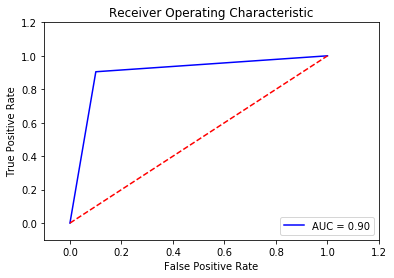

In [543]:
#call function to plot ROC AUC
plot_auc(false_positive_rate, true_positive_rate,auc_)

In [544]:
print(time.clock() - t0)

3545.3391402185803
